### 1. Preliminary analysis:
#### a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
#### b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

Variable	Description  
Age	Age in years  
Sex	1 = male; 0 = female  
cp|	Chest pain type  
trestbps	Resting blood pressure (in mm Hg on admission to the hospital)  
chol	Serum cholesterol in mg/dl  
fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
restecg	Resting electrocardiographic results  
thalach	Maximum heart rate achieved  
exang	Exercise induced angina (1 = yes; 0 = no)  
oldpeak	ST depression induced by exercise relative to rest  
slope	Slope of the peak exercise ST segment  
ca	Number of major vessels (0-3) colored by fluoroscopy  
thal	3 = normal; 6 = fixed defect; 7 = reversible defect  
Target	1 or 0  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel('1645792390_cep1_dataset.xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data[data.duplicated()]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
data = data.drop(164)

In [7]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [8]:
# All data is currently encoded as numerical data type, 
# although some variables are actually categorical.
# No missing values.
# One duplicate removed.


### 2. Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
#### a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We have a clear blend of numerical and categorical variables. Most of the numerical varriables show central tendency: Age, trestbps, chol, and thalach around their mean, although thalach is skewed to the left. Oldpeak however is severely skewed with its most frequent value 0 (also its minimum) comprising a third of the variable.

In [10]:
print(f'Percentage of oldpeak recording 0: {(data.oldpeak == 0).sum()/len(data.oldpeak)*100:.1f} %')

Percentage of oldpeak recording 0: 32.5 %


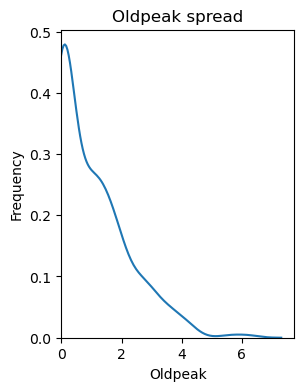

In [11]:
plt.figure(figsize=(3,4))
sns.kdeplot(data['oldpeak'])

plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Oldpeak spread')
plt.xlim(0)
plt.show()


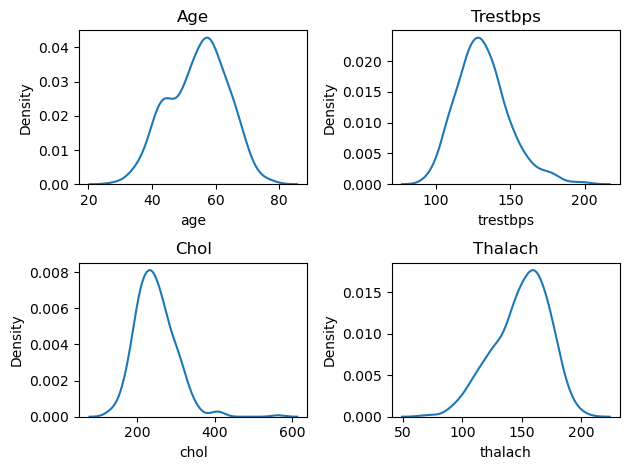

In [12]:
fig, axes = plt.subplots(2,2)
sns.kdeplot(data['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

sns.kdeplot(data['trestbps'], ax=axes[0, 1])
axes[0, 1].set_title('Trestbps')

sns.kdeplot(data['chol'], ax=axes[1, 0])
axes[1, 0].set_title('Chol')

sns.kdeplot(data['thalach'], ax=axes[1, 1])
axes[1, 1].set_title('Thalach')

plt.tight_layout()

#### b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [13]:
for col in sorted(data.columns, key = lambda col: data[col].nunique()):
    var_count = data[col].nunique()
    print(f"{col}, {var_count} unique values")

sex, 2 unique values
fbs, 2 unique values
exang, 2 unique values
target, 2 unique values
restecg, 3 unique values
slope, 3 unique values
cp, 4 unique values
thal, 4 unique values
ca, 5 unique values
oldpeak, 40 unique values
age, 41 unique values
trestbps, 49 unique values
thalach, 91 unique values
chol, 152 unique values


Categorical variables are therefore readily identifiable: 'sex','fbs','exang','restecg','slope', 'cp','thal','ca'

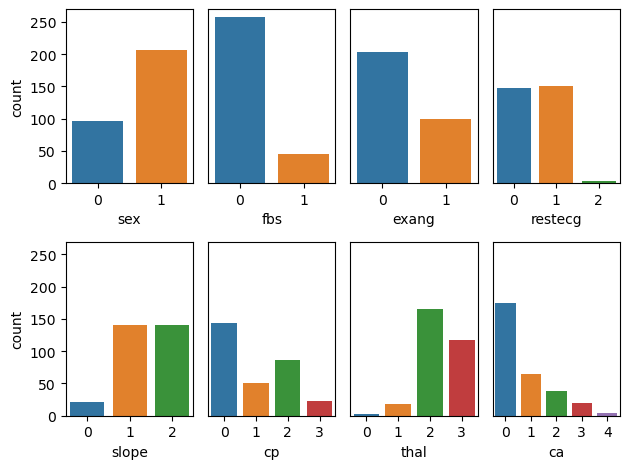

In [14]:
fig, axs = plt.subplots(2,4)
cat_cols = ['sex','fbs','exang','restecg','slope', 'cp','thal','ca']

for i, column in enumerate(cat_cols):
    row = i//4
    col = i%4
    sns.countplot(data=data, x =column, ax = axs[row,col])
    #axs[row, col].set_ylabel('Count')
    axs[row, col].set_ylim(0, 270)

    if col != 0:  # Set y-axis label to empty string for subplots other than the first one in each row
        axs[row, col].set_ylabel('')
        axs[row, col].set_yticks([])  # Remove y ticks


plt.tight_layout()
plt.show()

In particular, we can note that men are represented in the sample more than twice as much as women.

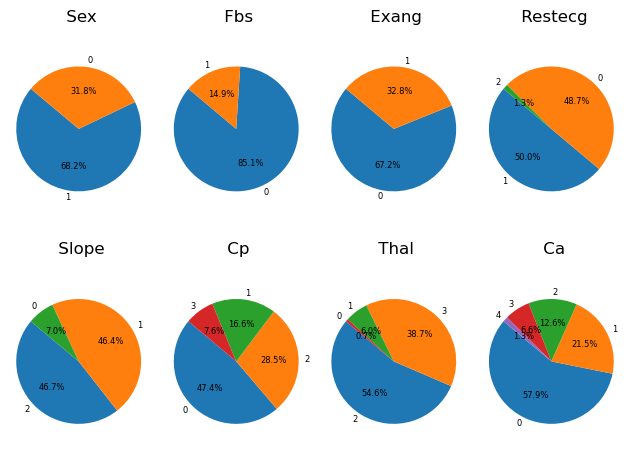

In [15]:
fig, axs = plt.subplots(2,4)
cat_cols = ['sex','fbs','exang','restecg','slope', 'cp','thal','ca']

for i, column in enumerate(cat_cols):
    row = i//4
    col = i%4
    labels = data[column].value_counts().index
    sizes = data[column].value_counts().values
    axs[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 6}, startangle=140)
    axs[row, col].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[row, col].set_title(f' {column.capitalize()}')

plt.tight_layout()
plt.show()

#### c. Study the occurrence of CVD across the Age category

In [16]:
data.age.min()

29

In [17]:
data.age.max()

77

In [18]:
data['age_group'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

In [19]:
crossed_data = pd.crosstab(data['age_group'],data['target'])
crossed_data

target,0,1
age_group,,
20-29,0,1
30-39,6,11
40-49,23,53
50-59,65,64
60-69,43,30
70-79,1,5


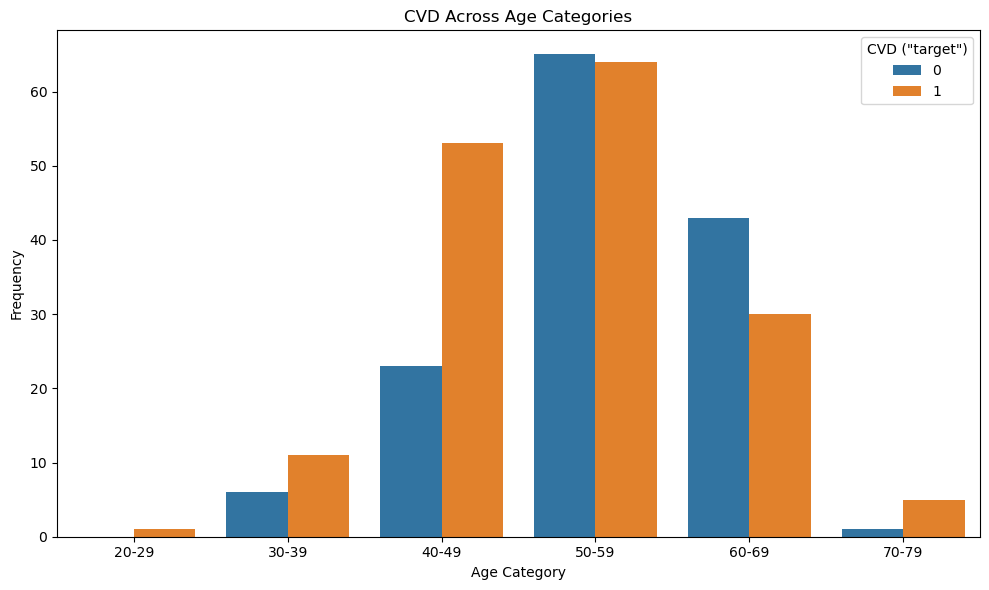

In [20]:

# Reshape the data for grouped bar plot
stacked_data = crossed_data.stack().reset_index()
stacked_data.columns = ['age_group', 'target', 'Frequency']

plt.figure(figsize=(10, 6))  # Set the figure size

# Create the grouped bar plot
sns.barplot(data=stacked_data, x='age_group', y='Frequency', hue='target', palette=['tab:blue', 'tab:orange'])

plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.title('CVD Across Age Categories')
plt.legend(title='CVD ("target")')

plt.tight_layout()
plt.show()


While this may appear meaningful, very little is provided with respect to the sampling technique used and we have reason to be sceptical. Maybe the data is stratified from a much larger set, or is the whole set from a small clinic, we just don't know, nor why 'target = 0' would be included in such sampling nor to what degree with respect to 'target = 1'.

The bell shapes we observe are also probably more to do with sampling than the actual impact of the variable age on CVD.

These caveats aside, this does visualise how CVD occurs across the dataset provided according to age. We also see that up to the 40-49 category, there are more cases of CVD than 0. For the next two decades represented that seems to reverse. This, of course, is not what we would expect and could be a misinterpretation of the definitions.

#### d. Study the composition of all patients with respect to the Sex category

In [21]:
data = data.drop(['age_group'], axis = 1)

In [22]:
data.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

--> we have an imbalanced sample (also visualised above in the first subplots in 2. b.). However, provided we are careful to make comparisons to males using percentages or relative values, this should not be an issue.

In [23]:
cat_cols = ['sex', 'fbs', 'exang', 'restecg', 'slope', 'cp', 'thal', 'ca', 'target']

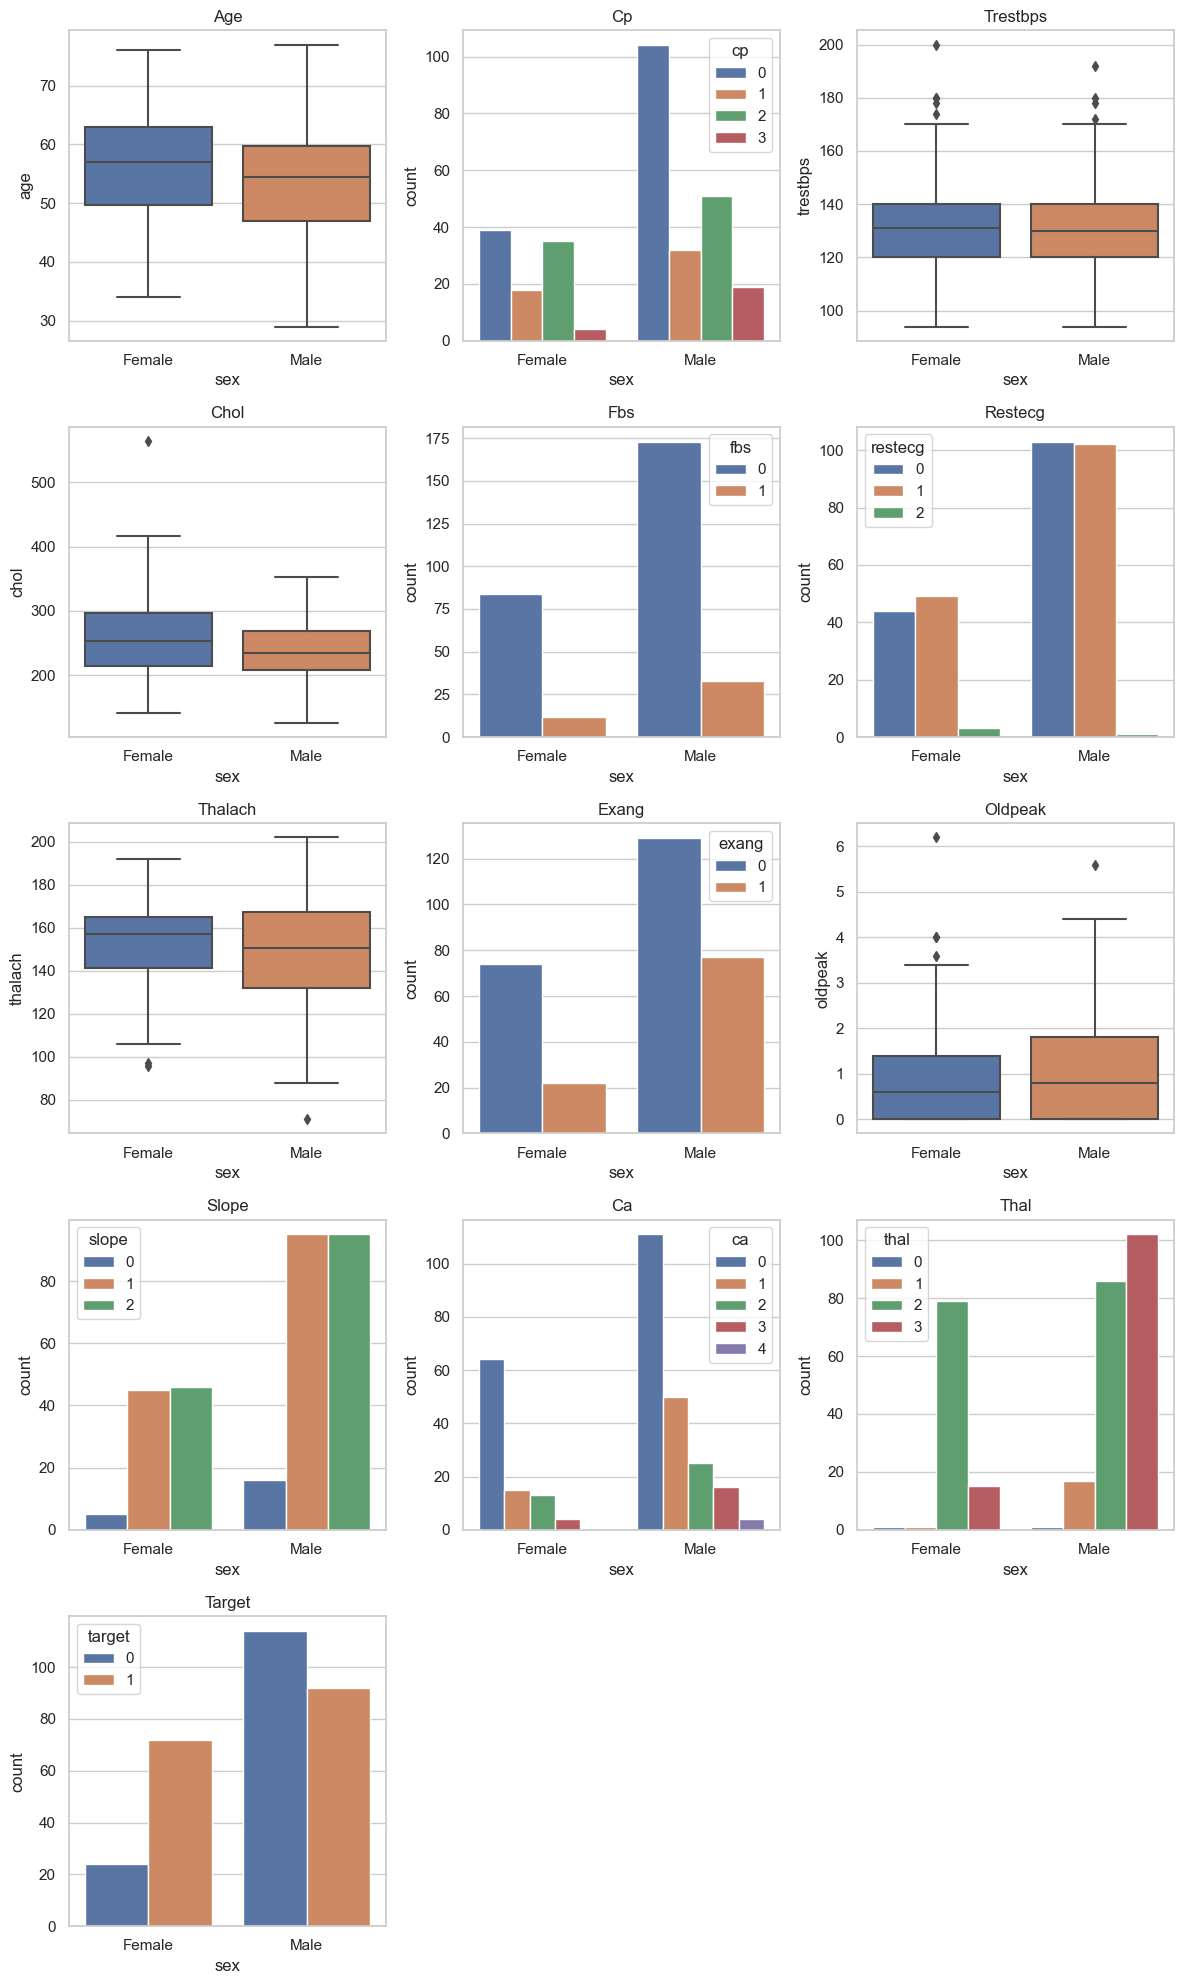

In [24]:


sns.set(style="whitegrid")
# Define the variables you want to analyze
variables_to_analyze = data.columns.drop('sex') 

# Create subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(variables_to_analyze) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the variables and create appropriate plots
for idx, variable in enumerate(variables_to_analyze):
    ax = axes[idx]
    
    if variable in cat_cols:
        # For categorical variables, create count plots
        sns.countplot(x='sex', hue=variable, data=data, ax=ax)
    else:
        # For numerical variables, create box plots
        sns.boxplot(x='sex', y=variable, data=data, ax=ax)
    
    ax.set_title(variable.capitalize())
    ax.set_xticklabels(['Female', 'Male'])  # Set x-tick labels

# Remove any empty subplots
if len(variables_to_analyze) < len(axes):
    for ax in axes[len(variables_to_analyze):]:
        ax.remove()

plt.subplots_adjust(hspace=0.8, wspace=0.3)  # Adjust as needed

plt.tight_layout()
plt.show()


#### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [25]:
trestbps_target_correl = data['target'].corr(data['trestbps'])
trestbps_target_correl 

-0.1462686638415544

Even if we can affirm a slight inverse relationship (-0.15), it certainly can not serve as a sole predictor for heart attacks.

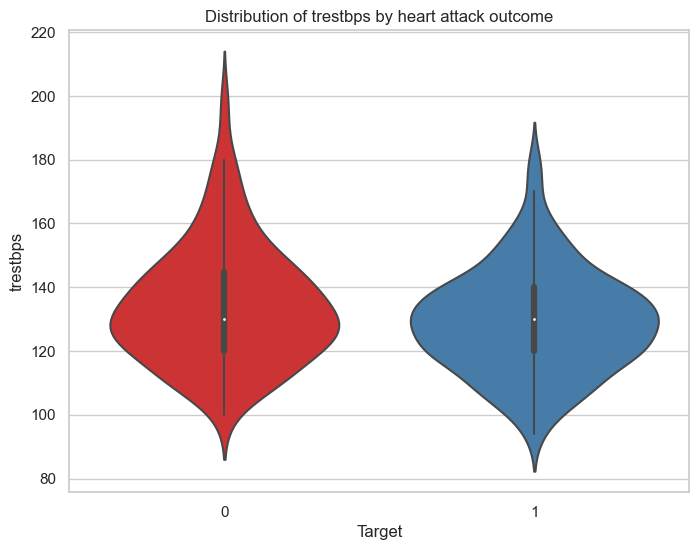

In [26]:

# Create a violin plot to visualize the distribution of 'trestbps' for each target class
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='trestbps', data=data, palette='Set1')
plt.xlabel('Target')
plt.ylabel('trestbps')
plt.title('Distribution of trestbps by heart attack outcome')
plt.show()


In [27]:
from scipy.stats import ttest_ind, mannwhitneyu

# Split the data into two groups based on the target classes
group_1 = data[data['target'] == 0]['trestbps']
group_2 = data[data['target'] == 1]['trestbps']

# Perform the independent samples t-test
t_statistic, p_value_t = ttest_ind(group_1, group_2)

# Perform the Mann-Whitney U test
u_statistic, p_value_mw = mannwhitneyu(group_1, group_2)

# Print the results
print("Independent Samples T-Test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_t)

print("\nMann-Whitney U Test:")
print("U-statistic:", u_statistic)
print("p-value:", p_value_mw)

Independent Samples T-Test:
t-statistic: 2.5609912831268065
p-value: 0.010926538861949147

Mann-Whitney U Test:
U-statistic: 12931.0
p-value: 0.03222615575138192


Both t and Mann-Whitney tests do nonetheless confirm that this variable should be maintained in determining the model, rejecting the null hypothesis that resting blood pressure has no bearing on the outcome.

#### f.	Describe the relationship between cholesterol levels and a target variable

In [28]:
chol_target_correl = data['target'].corr(data['chol'])
chol_target_correl 

-0.08143720051844144

Little relationship with the target variable, which is quite surprising and should cause us to question once again the sampling methods and general quality of the data. See The Framingham Heart Study over 70 years of research that affirm cholesterol as part of the predictive matrix. However, for the pure theoretical purposes of this dataset, we can expect a non-rejection of H0.

In [29]:
# Split the data into two groups based on the target classes
group_1 = data[data['target'] == 0]['chol']
group_2 = data[data['target'] == 1]['chol']

# Perform the independent samples t-test
t_statistic, p_value_t = ttest_ind(group_1, group_2)

# Perform the Mann-Whitney U test
u_statistic, p_value_mw = mannwhitneyu(group_1, group_2)

# Print the results
print("Independent Samples T-Test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_t)

Independent Samples T-Test:
t-statistic: 1.4152344258787561
p-value: 0.15803697464249714


In [30]:
#We fail to reject H0 and it can be removed from the data.
data = data.drop('chol',axis = 1, inplace=False)

In [31]:
data

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,0,1,115,1,1.2,1,1,3,0


#### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

We presume it is meant by 'peak exercising' the variable, "slope".

In [32]:
# Split the data into two groups based on the target classes
group_1 = data[data['target'] == 0]['slope']
group_2 = data[data['target'] == 1]['slope']

# Perform the independent samples t-test
t_statistic, p_value_t = ttest_ind(group_1, group_2)

# Perform the Mann-Whitney U test
u_statistic, p_value_mw = mannwhitneyu(group_1, group_2)

# Print the results
print("Independent Samples T-Test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_t)

Independent Samples T-Test:
t-statistic: -6.3442592985331965
p-value: 8.221388831029908e-10


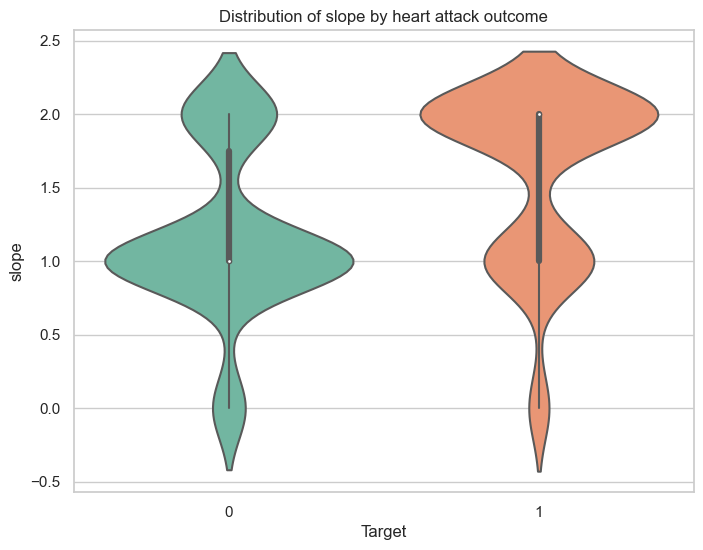

In [33]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='slope', data=data, palette='Set2')
plt.xlabel('Target')
plt.ylabel('slope')
plt.title('Distribution of slope by heart attack outcome')
plt.show()

'Slope' would appear predictive.

#### h.	Check if thalassemia is a major cause of CVD

In [34]:
# Split the data into two groups based on the target classes
group_1 = data[data['target'] == 0]['thal']
group_2 = data[data['target'] == 1]['thal']

# Perform the independent samples t-test
t_statistic, p_value_t = ttest_ind(group_1, group_2)

# Perform the Mann-Whitney U test
u_statistic, p_value_mw = mannwhitneyu(group_1, group_2)

# Print the results
print("Independent Samples T-Test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value_t)

Independent Samples T-Test:
t-statistic: 6.3267192360120825
p-value: 9.089044024817941e-10


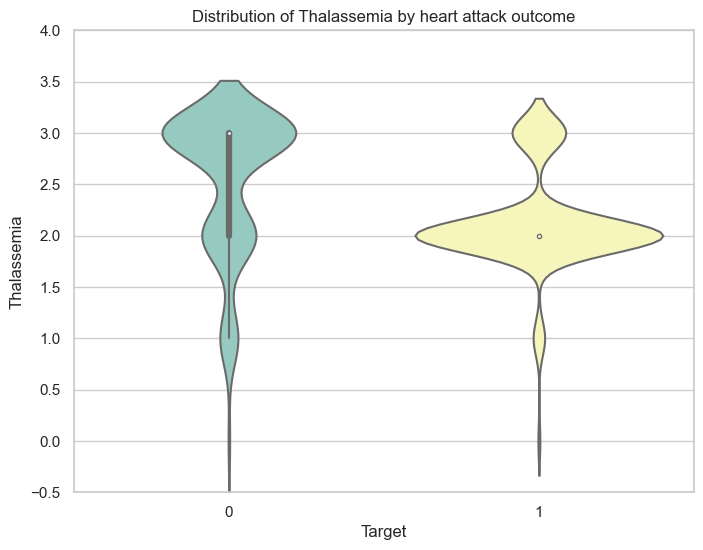

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='thal', data=data, palette='Set3')
plt.xlabel('Target')
plt.ylabel('Thalassemia')
plt.ylim(-0.5,4)
plt.title('Distribution of Thalassemia by heart attack outcome')
plt.show()

In [36]:
data.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

Thalassemia would appear strongly predictive. 
(Note that there are 2 occurrences of "0", it is not clear without consultation if these are errors or meaningful since each value is in fact a label. I prefer to assume that it is significant and that the dataset description is incomplete.)

#### i.	List how the other factors determine the occurrence of CVD

So far, we have examined: cholesterol, thalassemia, age, sex, resting blood pressure and peak exercise (slope). Chest pain type ('cp'), fasting blood sugar ('fbs'), resting electrocardiographic results ('restecg'), maximum heart rate achieved ('thalach'), exercise induced angina ('exang'), ST depression induced by exercise relative to rest ('oldpeak') and number of major vessels (0-3) colored by fluoroscopy ('ca') all remain. Let us correlate using heatmap.

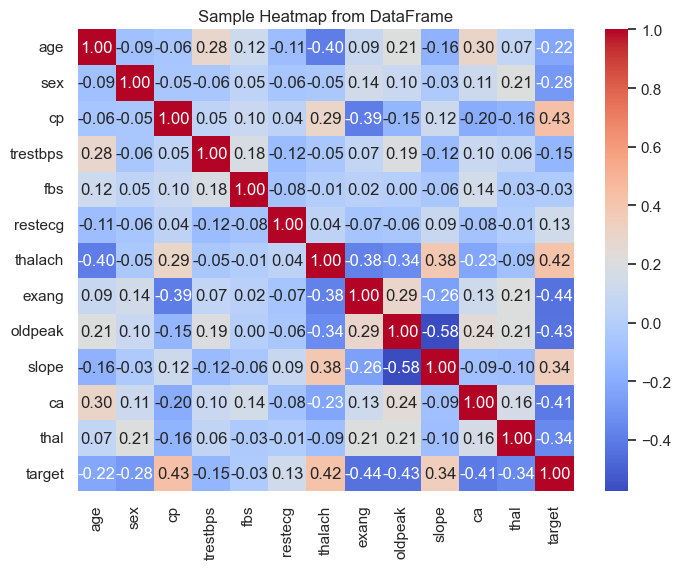

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Sample Heatmap from DataFrame')
plt.show()

In [38]:
data.corr()['target'].sort_values()

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64

On the positive side, thalach (0.419955) and cp (0.432080) are strongest, while ca (-0.435601), oldpeak (-0.429146) and ca (-0.408992) have strongest relationships with target.
fbs is demonstrably insignificant and like cholesterol can be dropped.
For the doubts expressed above on sex variable, I would reserve this for optional dropping when evaluating model performance.
Oldpeak and slope have quite strong colinearity and should be tested also.

In [39]:
data = data.drop('fbs', axis = 1)
data.head(2)

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1


#### j.	Use a pair plot to understand the relationship between all the given variables

The pair plot should be split into 2 for visibility purposes.

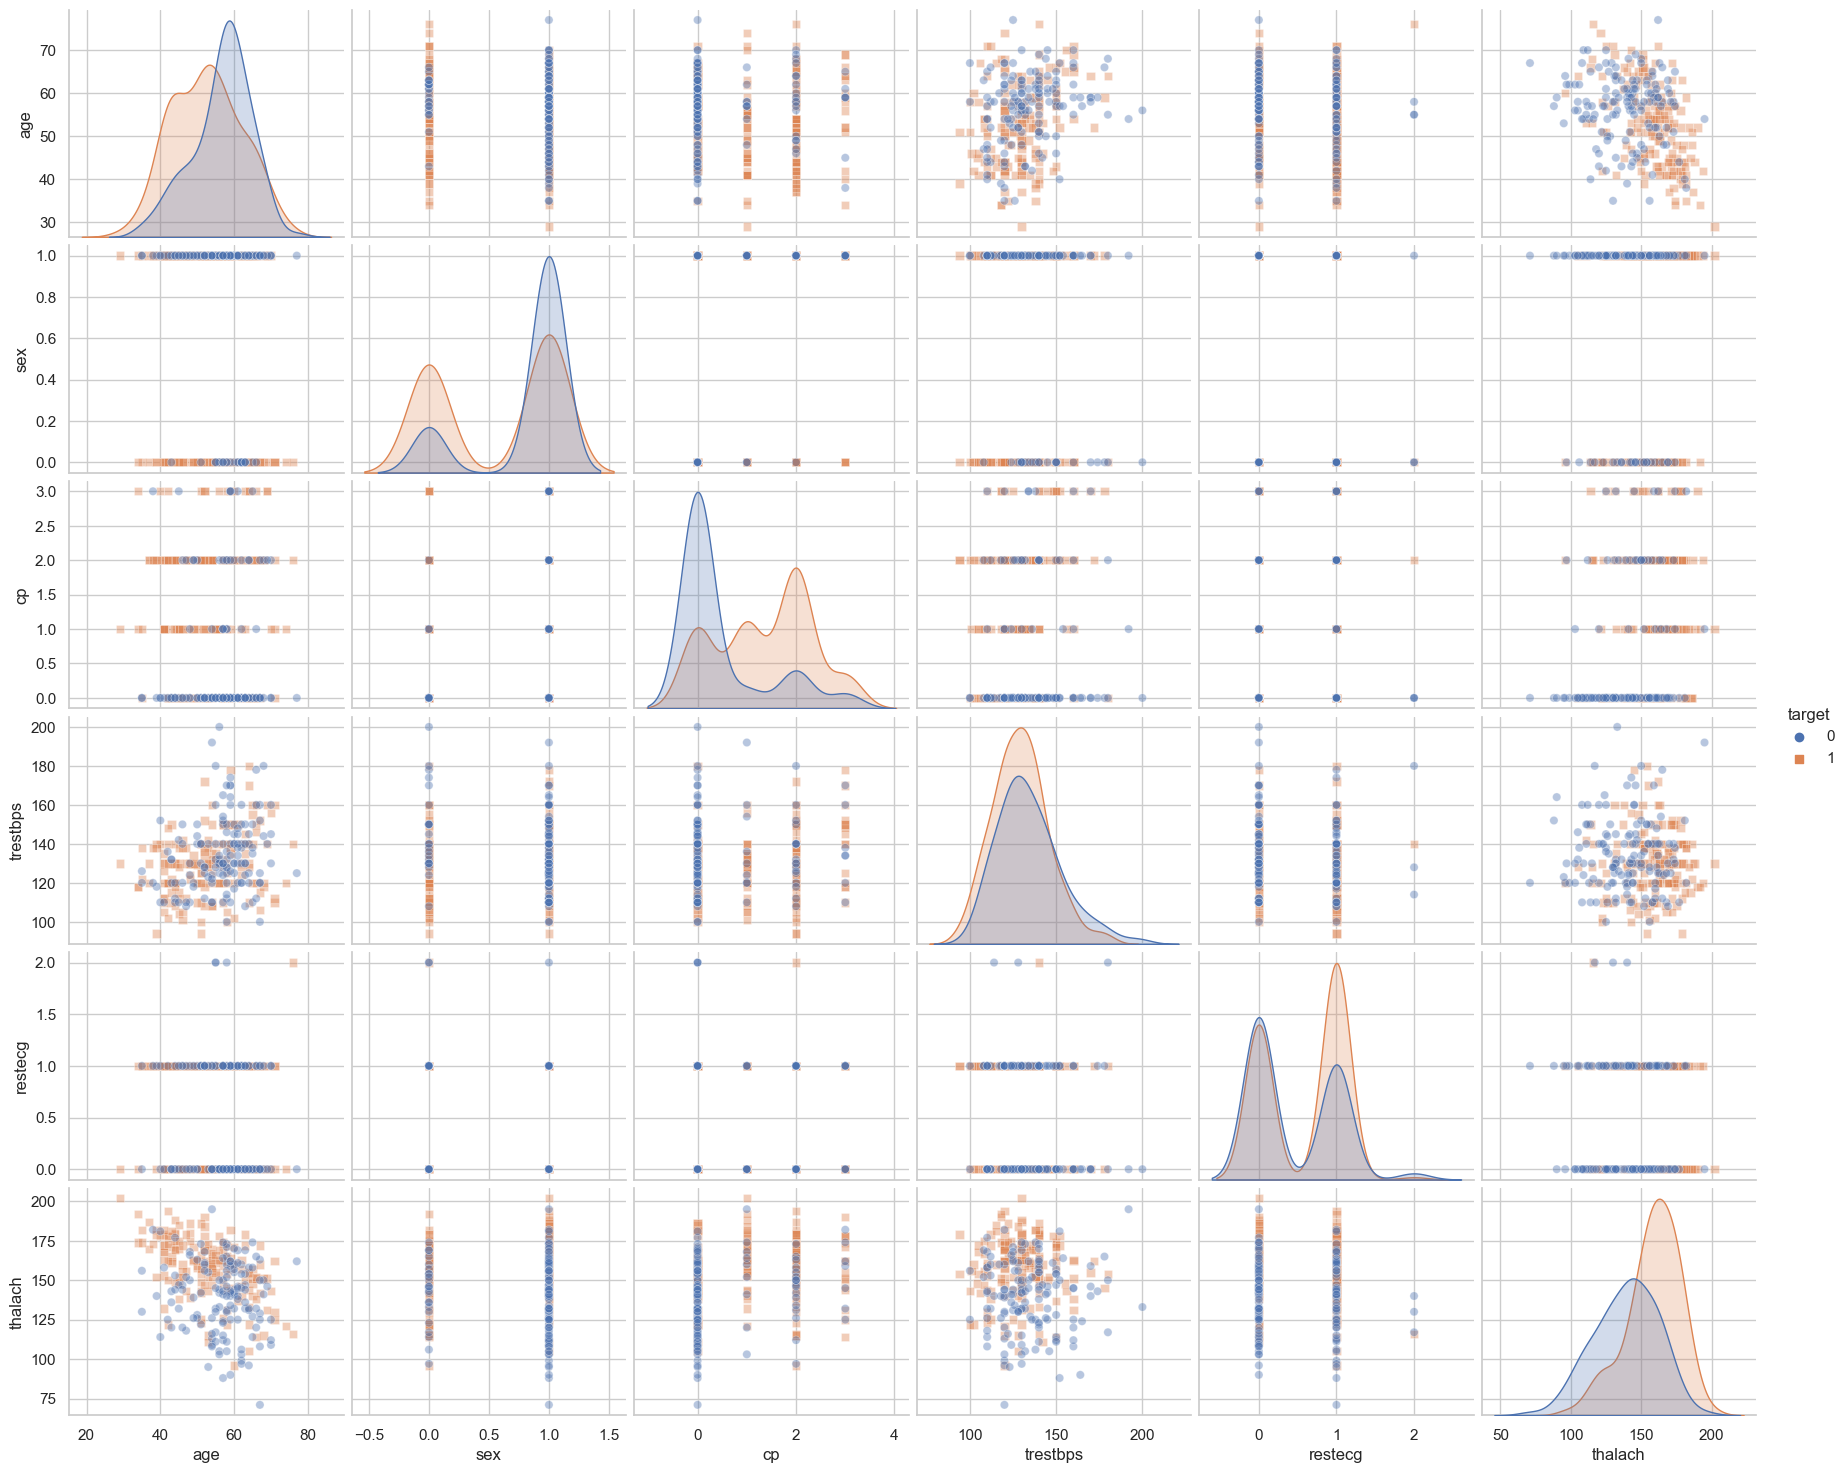

In [40]:
sns.pairplot(data[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'target']], 
             hue='target', 
             diag_kind='kde', 
             markers=["o", 's'], 
             plot_kws={'alpha':0.4}, 
             height=2.5, 
             aspect=1.2)
plt.show()

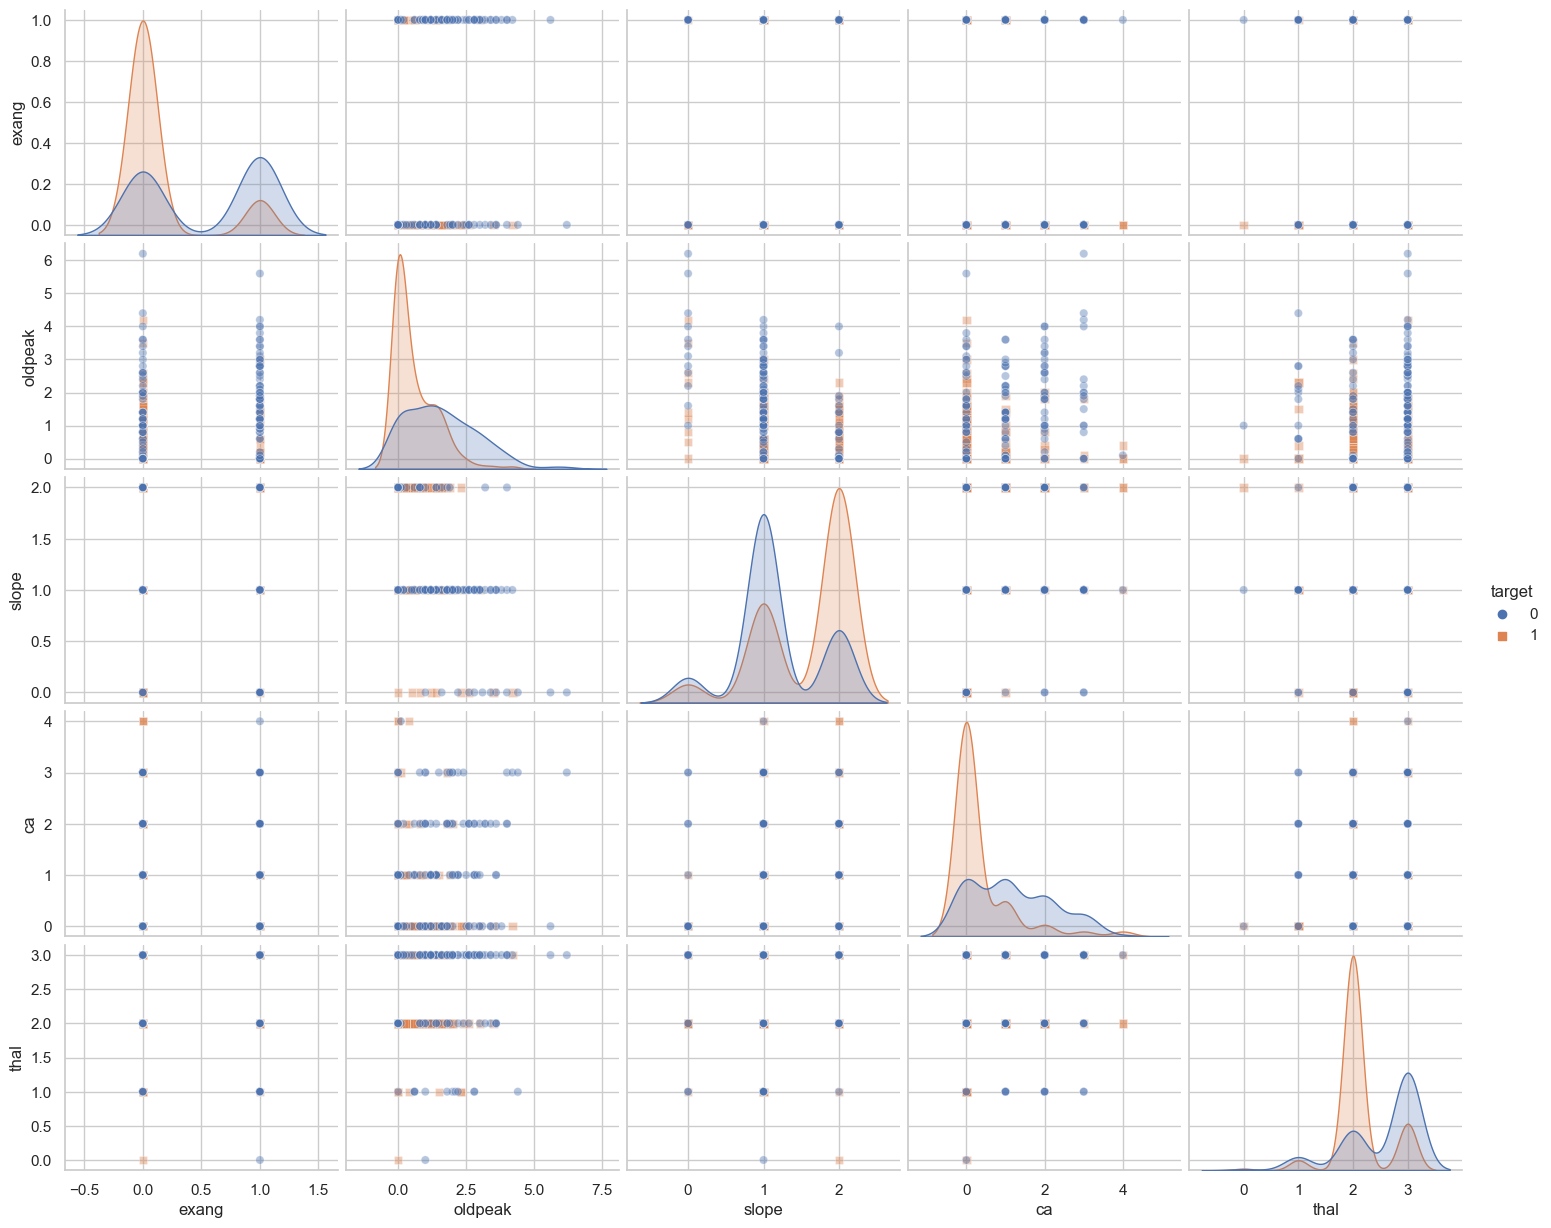

In [41]:
sns.pairplot(data[['exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']], 
             hue='target', 
             diag_kind='kde', 
             markers=["o", 's'], 
             plot_kws={'alpha':0.4}, 
             height=2.5, 
             aspect=1.2)
plt.show()

Data is clearly not linearly separable, so we will favour an ensemble approach to develop a model in part 3.

### 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [42]:
df = data

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.svm import SVC
svm = SVC()
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ad = AdaBoostClassifier()
from sklearn.naive_bayes import MultinomialNB, GaussianNB
mn = GaussianNB()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(#solver='newton-cg'
max_iter = 1000)
from xgboost import XGBClassifier
xg = XGBClassifier()

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
svm.fit(X_train, y_train)

SVC()

In [51]:
mn.fit(X_train, y_train)

GaussianNB()

In [52]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [54]:
ad.fit(X_train, y_train)

AdaBoostClassifier()

In [55]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_test_pred_dt = dt.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_SVM = svm.predict(X_test)
y_test_pred_mn = mn.predict(X_test)
y_test_pred_lr = lr.predict(X_test)
y_test_pred_gb = gb.predict(X_test)
y_test_pred_ad = ad.predict(X_test)
y_test_pred_xg = xg.predict(X_test)

In [57]:
tests = ['Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'LogRegression', 'Gradient Boost', 'AdaBoost', 'XGBoost']

In [58]:
print(tests)

['Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'LogRegression', 'Gradient Boost', 'AdaBoost', 'XGBoost']


In [59]:
df.iloc[:,-1].value_counts()
## Since value counts are relatively equal, we can use the accuracy score as our evaluation metric.

1    164
0    138
Name: target, dtype: int64

In [60]:
accuracy_scores = [accuracy_score(y_test, y_test_pred_dt), 
                  accuracy_score(y_test, y_test_pred_rf), 
                  accuracy_score(y_test, y_test_pred_SVM),
                  accuracy_score(y_test, y_test_pred_mn),
                  accuracy_score(y_test, y_test_pred_lr),
                  accuracy_score(y_test, y_test_pred_gb),
                  accuracy_score(y_test, y_test_pred_ad),
                  accuracy_score(y_test, y_test_pred_xg)]

In [61]:
list(zip(tests, accuracy_scores))

[('Decision Tree', 0.8032786885245902),
 ('Random Forest', 0.8524590163934426),
 ('SVM', 0.7377049180327869),
 ('Naive Bayes', 0.8688524590163934),
 ('LogRegression', 0.8524590163934426),
 ('Gradient Boost', 0.819672131147541),
 ('AdaBoost', 0.819672131147541),
 ('XGBoost', 0.819672131147541)]

While logistic regression performs well (score of 0.85), **Naive Bayes (0.87) performs even better** on overall accuracy.
In the context of diagnosis of risk of heart disease, owever, we need to place a greater emphasis on false negatives. Let us examine this via confusion matrixes and classification reports:

In [62]:
print('DT\n',confusion_matrix(y_test, y_test_pred_dt),
      classification_report(y_test, y_test_pred_dt), 
      '\nRF\n',confusion_matrix(y_test, y_test_pred_rf),
      classification_report(y_test, y_test_pred_rf), 
      '\nSVM\n',confusion_matrix(y_test, y_test_pred_SVM),
      classification_report(y_test, y_test_pred_SVM),
      '\nBayes\n',confusion_matrix(y_test, y_test_pred_mn),
      classification_report(y_test, y_test_pred_mn),
      '\nLogReg\n',confusion_matrix(y_test, y_test_pred_lr),
      classification_report(y_test, y_test_pred_lr),
      '\nGB\n',confusion_matrix(y_test, y_test_pred_gb),
      classification_report(y_test, y_test_pred_gb),
      '\nAda\n',confusion_matrix(y_test, y_test_pred_ad),
      classification_report(y_test, y_test_pred_ad),
      '\nXGB\n',confusion_matrix(y_test, y_test_pred_xg),
      classification_report(y_test, y_test_pred_xg))

DT
 [[26  3]
 [ 9 23]]               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61
 
RF
 [[25  4]
 [ 5 27]]               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 
SVM
 [[18 11]
 [ 5 27]]               precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.71      0.84      0.77        32

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
we

In [63]:
print('\nDT', classification_report(y_test, y_test_pred_dt), 
      '\nRF', classification_report(y_test, y_test_pred_rf), 
      '\nSVM', classification_report(y_test, y_test_pred_SVM),
      '\nBayes', classification_report(y_test, y_test_pred_mn),
      '\nLogReg', classification_report(y_test, y_test_pred_lr),
      '\nGB', classification_report(y_test, y_test_pred_gb),
      '\nAda', classification_report(y_test, y_test_pred_ad),
      '\nXGB', classification_report(y_test, y_test_pred_xg))


DT               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61
 
RF               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 
SVM               precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.71      0.84      0.77        32

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61
 
Bayes

Here, Bayes is joint best along with logistic regression, misclassifying five times test values as false negatives, with recall 1 score 0.82.

In [64]:
# Testing further feature selection / removal: sex, oldpeak, slope
df_test=df.drop('sex', axis = 1)

In [65]:
X = df_test.drop(df.columns[-1], axis=1)
y = df_test[df_test.columns[-1]]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [67]:
mn.fit(X_train, y_train)

GaussianNB()

In [68]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_test_pred_mn = mn.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

In [70]:
print( '\nBayes\n',confusion_matrix(y_test, y_test_pred_mn),
      classification_report(y_test, y_test_pred_mn),
      
     '\nLogReg\n',confusion_matrix(y_test, y_test_pred_lr), 
      classification_report(y_test, y_test_pred_lr))


Bayes
 [[26  3]
 [ 6 26]]               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61
 
LogReg
 [[24  5]
 [ 5 27]]               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



Removing 'sex' may have harmed Bayes performance.

In [71]:
#Trying dropping slope:
df_test=df.drop('slope', axis = 1)

In [72]:
X = df_test.drop(df.columns[-1], axis=1)
y = df_test[df_test.columns[-1]]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [74]:
mn.fit(X_train, y_train)

GaussianNB()

In [75]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
y_test_pred_mn = mn.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

In [77]:
print( '\nBayes\n',confusion_matrix(y_test, y_test_pred_mn),
      classification_report(y_test, y_test_pred_mn),
      
     '\nLogReg\n',confusion_matrix(y_test, y_test_pred_lr), 
      classification_report(y_test, y_test_pred_lr))


Bayes
 [[27  2]
 [ 6 26]]               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61
 
LogReg
 [[25  4]
 [ 3 29]]               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [78]:
y_test_pred_mn = mn.predict(X_test)

In [79]:
# removing slope improved LR performance. Trying oldpeak:
df_test=df.drop('oldpeak', axis = 1)

In [80]:
X = df_test.drop(df.columns[-1], axis=1)
y = df_test[df_test.columns[-1]]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [82]:
mn.fit(X_train, y_train)

GaussianNB()

In [83]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [84]:
y_test_pred_mn = mn.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

In [85]:
print( '\nBayes\n',confusion_matrix(y_test, y_test_pred_mn),
      classification_report(y_test, y_test_pred_mn),
      
     '\nLogReg\n',confusion_matrix(y_test, y_test_pred_lr), 
      classification_report(y_test, y_test_pred_lr))


Bayes
 [[26  3]
 [ 7 25]]               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61
 
LogReg
 [[24  5]
 [ 7 25]]               precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [86]:
# removing oldpeak significantly harmed performance. Trying dropping oldpeak and slope:
df_test=df.drop(['oldpeak', 'slope'], axis = 1)

In [87]:
X = df_test.drop(df.columns[-1], axis=1)
y = df_test[df_test.columns[-1]]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [89]:
mn.fit(X_train, y_train)

GaussianNB()

In [90]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [91]:
y_test_pred_mn = mn.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

In [92]:
print( '\nBayes\n',confusion_matrix(y_test, y_test_pred_mn),
      classification_report(y_test, y_test_pred_mn),
      
     '\nLogReg\n',confusion_matrix(y_test, y_test_pred_lr), 
      classification_report(y_test, y_test_pred_lr))


Bayes
 [[17  1]
 [ 8 20]]               precision    recall  f1-score   support

           0       0.68      0.94      0.79        18
           1       0.95      0.71      0.82        28

    accuracy                           0.80        46
   macro avg       0.82      0.83      0.80        46
weighted avg       0.85      0.80      0.81        46
 
LogReg
 [[18  0]
 [ 5 23]]               precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.82      0.90        28

    accuracy                           0.89        46
   macro avg       0.89      0.91      0.89        46
weighted avg       0.91      0.89      0.89        46



Removing oldpeak and slope had a significant harming effect on model performance for Bayes (+3 FN) while LR remained unchanged. But less harm was done than by removing both oldpeak and slope, suggesting some colinearity with these two variables.

"...explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection"

In [93]:
import statsmodels.api as sm

# Prepare the data for logistic regression with original variables
X = data[["sex", "exang", "restecg", "slope", "cp", "thal", "ca", "oldpeak", "age", "trestbps", "thalach"]]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = data["target"] 

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Print the summary of the logistic regression
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.350549
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           11
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.4915
Time:                        21:48:11   Log-Likelihood:                -105.87
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.913e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6420      2.508      1.053      0.292      -2.274       7.558
sex           -1.5864      0.

This analysis which builds off z (which in turn uses standard error), implies that for p = 0.05 several additional variables could be eliminated: restecg, slope, age and trestbps. Let us do a 'hard prune' and remove these and compare both logistic and Bayes performance with the remaining variables:
"sex", "exang", "cp", "thal", "ca", "oldpeak", "thalach".

In [94]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [95]:
X = df[["sex", "exang", "cp", "thal", "ca", "oldpeak", "thalach"]]

In [96]:
y = df['target']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, #random_state=41
                                                   )

In [98]:
mn.fit(X_train, y_train)

GaussianNB()

In [99]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [100]:
y_test_pred_mn = mn.predict(X_test)
y_test_pred_lr = lr.predict(X_test)

In [101]:
print( '\nBayes\n',confusion_matrix(y_test, y_test_pred_mn),
      classification_report(y_test, y_test_pred_mn),
      
     '\nLogReg\n',confusion_matrix(y_test, y_test_pred_lr), 
      classification_report(y_test, y_test_pred_lr))


Bayes
 [[22  7]
 [ 6 26]]               precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61
 
LogReg
 [[22  7]
 [ 3 29]]               precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.81      0.91      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [102]:
print('Naive Bayes: ', accuracy_score(y_test, y_test_pred_mn))
print('Logistic Regression: ', accuracy_score(y_test, y_test_pred_lr))

Naive Bayes:  0.7868852459016393
Logistic Regression:  0.8360655737704918


Interestingly, we see both LR and NB after the heavy prune performing well on the 'hard prune' (df[["sex", "exang", "cp", "thal", "ca", 'oldpeak', 'thalach']]) reducing to just a few false negatives at the expense of false positives (the precise numbers vary if random_state is not applied).

Performance between both models remains very close. We will now perform a cross validation analysis to determine the average performance across folds.

In [103]:
from sklearn.model_selection import StratifiedKFold

In [104]:
# Define the number of folds
num_folds = 5

In [105]:
from sklearn.metrics import recall_score

# Define your model (mn in this case)
model = mn

# Initialize KFold cross-validation
kf = StratifiedKFold(n_splits=num_folds)

# Initialize a list to store recall scores for each fold
recall_scores = []

# Iterate through the folds
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate recall for class 1
    recall_class_1 = recall_score(y_val, y_pred, pos_label=1, zero_division=0)
    recall_scores.append(recall_class_1)

# Calculate the average recall across folds
average_recall = sum(recall_scores) / num_folds

print('Average Recall (Bayes):', average_recall)
print('Fold results:', recall_scores)


Average Recall (Bayes): 0.8475378787878789
Fold results: [0.8787878787878788, 0.8787878787878788, 0.7272727272727273, 0.9090909090909091, 0.84375]


In [106]:
model = lr

# Initialize a list to store recall scores for each fold
recall_scores = []

# Iterate through the folds
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate recall for class 1
    recall_class_1 = recall_score(y_val, y_pred, pos_label=1, zero_division=0)
    recall_scores.append(recall_class_1)

# Calculate the average recall across folds
average_recall = sum(recall_scores) / num_folds

print('Average Recall (LR):', average_recall)
print('Fold results:', recall_scores)

Average Recall (LR): 0.8839015151515153
Fold results: [0.9393939393939394, 0.9090909090909091, 0.7878787878787878, 0.9393939393939394, 0.84375]


In [107]:
#FNs (Bayes)

false_negatives_class_1 = []  # Store the number of false negatives for class 1

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    mn.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = mn.predict(X_val)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    
    # Retrieve the number of false negatives for class 1 (row 1, column 0 in the confusion matrix)
    false_negatives = cm[1, 0]
    false_negatives_class_1.append(false_negatives)

# Calculate the average number of false negatives for class 1
average_false_negatives_class_1 = sum(false_negatives_class_1) / num_folds

print('Average recall class 1 (Bayes): ', average_false_negatives_class_1,
      '\n fold results: ', false_negatives_class_1)  # Return the calculated average number of false negatives for class 1


Average recall class 1 (Bayes):  5.0 
 fold results:  [4, 4, 9, 3, 5]


In [108]:
#FNs (LR)

false_negatives_class_1 = []  # Store the number of false negatives for class 1

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    lr.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = lr.predict(X_val)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    
    # Retrieve the number of false negatives for class 1 (row 1, column 0 in the confusion matrix)
    false_negatives = cm[1, 0]
    false_negatives_class_1.append(false_negatives)

# Calculate the average number of false negatives for class 1
average_false_negatives_class_1 = sum(false_negatives_class_1) / num_folds

print('Average recall class 1 (LR): ', average_false_negatives_class_1,
      '\n fold results: ', false_negatives_class_1)  # Return the calculated average number of false negatives for class 1


Average recall class 1 (LR):  3.8 
 fold results:  [2, 3, 7, 2, 5]


The central fold appeared more complex in terms of recall. But **Logistic regression** model is now nearly ready and visibly has the edge on Bayes.